<a href="https://colab.research.google.com/github/fahmiardiansyahh/projecttokohelm/blob/master/Ekseperimen_UCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Experimen dengan korelasi person

In [67]:
# import package
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support,roc_auc_score)

In [68]:
# Load ucp 
df = pd.read_csv('Dataset1.csv')
df = df.fillna(df.mean())
df.head(10)

,Project_No,Simple Actors,Average Actors,Complex Actors,UAW,Simple UC,Average UC,Complex UC,UUCW,TCF,ECF,Real_P20,Real_Effort_Person_Hours
0,1,1.000000,1,2,9,6,10,15,355,81,84,3985,7970
1,2,1.000000,2,1,8,4,20,15,445,99,99,3981,7962
2,3,0.000000,0,3,9,1,5,20,355,103,8,39675,7935
3,4,0.000000,1,2,8,5,10,15,350,9,91,39025,7805
4,5,1.000000,2,1,8,1,10,16,345,9,91,3879,7758
5,6,2.000000,0,2,8,1,13,14,345,99,99,38215,7643
6,7,0.000000,2,1,7,3,18,15,420,94,102,3766,7532
7,8,0.000000,1,2,8,0,16,12,340,103,8,37255,7451
8,9,0.714286,1,2,8,2,10,15,335,94,102,37245,7449
9,10,4.000000,0,1,7,4,14,17,415,1025,98,37135,7427


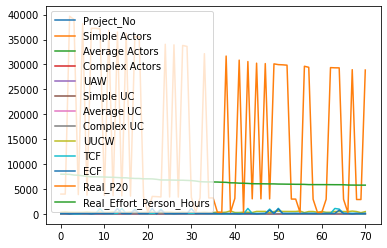

In [69]:
## Load Fitur
df.plot()
plt.show()

In [70]:
X = df.drop("Real_Effort_Person_Hours",axis=1)   #Feature Matrix
y = df["Real_Effort_Person_Hours"] 

In [71]:
X

,Project_No,Simple Actors,Average Actors,Complex Actors,UAW,Simple UC,Average UC,Complex UC,UUCW,TCF,ECF,Real_P20
0,1,1.0,1,2,9,6,10,15,355,81,84,3985
1,2,1.0,2,1,8,4,20,15,445,99,99,3981
2,3,0.0,0,3,9,1,5,20,355,103,8,39675
3,4,0.0,1,2,8,5,10,15,350,9,91,39025
4,5,1.0,2,1,8,1,10,16,345,9,91,3879
...,...,...,...,...,...,...,...,...,...,...,...,...
66,67,0.0,3,4,18,2,18,18,460,105,95,290
67,68,1.0,2,4,17,1,23,22,565,103,8,28955
68,69,0.0,2,5,19,5,30,10,475,95,92,2891
69,70,0.0,0,2,6,5,15,5,250,1,92,2889


In [72]:
y

0     7970
1     7962
2     7935
3     7805
4     7758
      ... 
66    5800
67    5791
68    5782
69    5778
70    5775
Name: Real_Effort_Person_Hours, Length: 71, dtype: int64

In [73]:
X.corr()

,Project_No,Simple Actors,Average Actors,Complex Actors,UAW,Simple UC,Average UC,Complex UC,UUCW,TCF,ECF,Real_P20
Project_No,1.000000,-0.112142,0.076600,0.630930,0.577256,0.066171,0.445264,0.127879,0.377268,0.035159,-0.045934,-0.146489
Simple Actors,-0.112142,1.000000,0.051933,-0.164266,0.050191,0.066462,0.017349,0.117861,0.109701,0.180785,0.192799,-0.109253
Average Actors,0.076600,0.051933,1.000000,0.125035,0.473170,0.009976,0.424390,0.258688,0.453504,-0.140921,-0.162250,-0.062762
Complex Actors,0.630930,-0.164266,0.125035,1.000000,0.915231,0.370517,0.547672,0.474949,0.749159,0.051822,-0.055361,0.098145
UAW,0.577256,0.050191,0.473170,0.915231,1.000000,0.349400,0.647346,0.539216,0.854489,0.030308,-0.071651,0.043853
Simple UC,0.066171,0.066462,0.009976,0.370517,0.349400,1.000000,0.272154,0.105019,0.406694,0.011057,0.051232,0.007461
Average UC,0.445264,0.017349,0.424390,0.547672,0.647346,0.272154,1.000000,-0.040828,0.621474,0.065448,0.069455,-0.223988
Complex UC,0.127879,0.117861,0.258688,0.474949,0.539216,0.105019,-0.040828,1.000000,0.741882,0.045766,-0.029189,0.253405
UUCW,0.377268,0.109701,0.453504,0.749159,0.854489,0.406694,0.621474,0.741882,1.000000,0.075887,0.028664,0.055022
TCF,0.035159,0.180785,-0.140921,0.051822,0.030308,0.011057,0.065448,0.045766,0.075887,1.000000,0.437741,0.165073


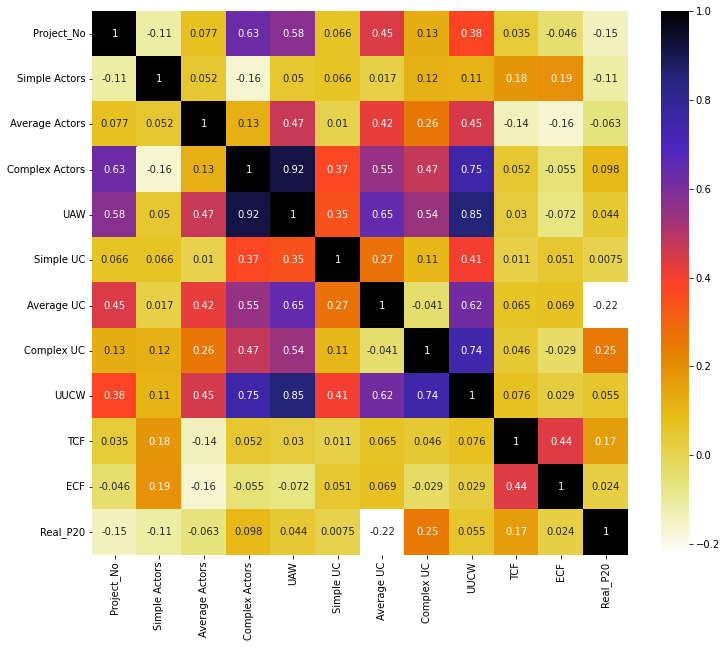

In [74]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [75]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [76]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

2

In [77]:
corr_features

{'UAW', 'UUCW'}

In [78]:
max_corr_features = ['UAW','UUCW']
X = df[max_corr_features]
y = df['Real_Effort_Person_Hours']

In [79]:
X

,UAW,UUCW
0,9,355
1,8,445
2,9,355
3,8,350
4,8,345
...,...,...
66,18,460
67,17,565
68,19,475
69,6,250


In [80]:
y

0     7970
1     7962
2     7935
3     7805
4     7758
      ... 
66    5800
67    5791
68    5782
69    5778
70    5775
Name: Real_Effort_Person_Hours, Length: 71, dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
# scale pre processing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [83]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

In [84]:
df_temp_lr = pd.DataFrame({'Actual': y_test, 'Predicted LR': y_pred_lr})
df_temp_lr.head()

,Actual,Predicted LR
9,7427,7185.238315
45,6051,6198.658311
0,7970,6826.769425
40,6232,6832.043933
11,7365,6862.109863


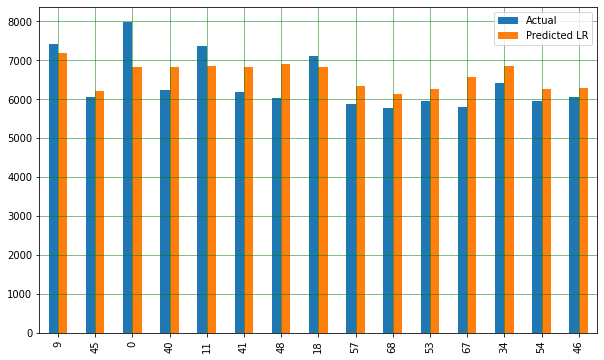

In [85]:
df_temp_lr = df_temp_lr.head(30)
df_temp_lr.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [86]:
score_lr=r2_score(y_test,y_pred_lr)
print('r2 score LR',score_lr)

r2 score LR 0.3136588293482131


In [87]:
diff=np.absolute(y_test-y_pred_lr)
MRE=diff/y_test
MMRE_list_regression=np.mean(MRE)

In [88]:
print('MMRE LR =',MMRE_list_regression)

MMRE LR = 0.07658387344741617


In [89]:
MMRE_list_lr=[]
for i in np.arange(1,4):   
    model_lr = LinearRegression()
    model_lr.fit(X_train_scaled, y_train)
    y_pred_lr = model_lr.predict(X_test_scaled)
    diff=np.absolute(y_test-y_pred_lr)
    MRE=diff/y_test
    MMRE_list_regression=np.mean(MRE)
    MMRE_list_lr.append(MMRE_list_regression)

In [90]:
MMRE_list_lr

[0.07658387344741617, 0.07658387344741617, 0.07658387344741617]

##DECISION TREE

In [91]:
#DT
from sklearn.tree import DecisionTreeRegressor 
model_tree = DecisionTreeRegressor(random_state = 0) 
model_tree.fit(X_train_scaled,y_train)
y_pred_dt=model_tree.predict(X_test_scaled)

In [92]:
df_temp_dt = pd.DataFrame({'Actual': y_test, 'Predicted DT': y_pred_dt})
df_temp_dt.head()

,Actual,Predicted DT
9,7427,6390.0
45,6051,5787.5
0,7970,7451.0
40,6232,5927.0
11,7365,5880.0


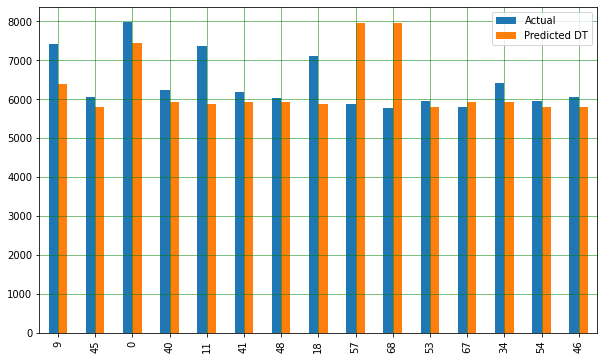

In [93]:
df_temp_dt = df_temp_dt.head(30)
df_temp_dt.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [94]:
# predicting the accuracy score
score_dt=r2_score(y_test,y_pred_dt)
print('r2 score dt',score_dt)

r2 score dt -1.1564491748630452


In [95]:
diff_dt=np.absolute(y_test-y_pred_dt)
MRE=diff_dt/y_test
MMRE_dt=np.mean(MRE)

In [96]:
MMRE_dt_list=[]
for i in np.arange(1,4):   
    model_dt = DecisionTreeRegressor(random_state = 0)
    model_dt.fit(X_train_scaled, y_train)
    y_pred_dt = model_dt.predict(X_test_scaled)
    diff_dt=np.absolute(y_test-y_pred_dt)
    MRE=diff_dt/y_test
    MMRE=np.mean(MRE)
    MMRE_dt_list.append(MMRE)

In [97]:
print('MMRE DT =',MMRE_dt)

MMRE DT = 0.11056703276215574


##Adaboost

In [98]:
from sklearn.ensemble import AdaBoostRegressor

In [99]:
DTR=DecisionTreeRegressor(max_depth=30)
RegModel = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)

In [100]:
AB=RegModel.fit(X_train_scaled,y_train)
prediction_AB=AB.predict(X_test_scaled)

In [101]:
df_temp_AB = pd.DataFrame({'Actual': y_test, 'Predicted AB': prediction_AB})
df_temp_AB.head()

,Actual,Predicted AB
9,7427,6416.5
45,6051,5790.0
0,7970,7451.0
40,6232,5927.0
11,7365,5880.0


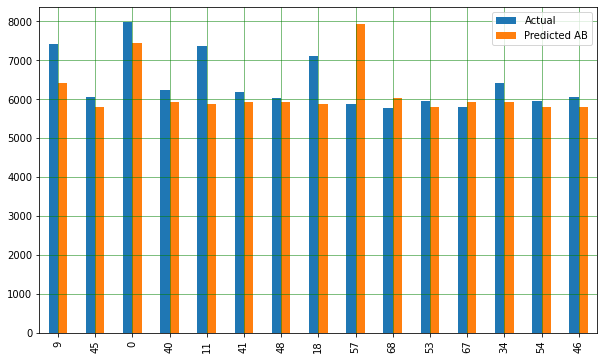

In [102]:
df_temp_AB = df_temp_AB.head(30)
df_temp_AB.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [103]:
# predicting the accuracy score
score_ab=r2_score(y_test,prediction_AB)
print('r2 score gbr',score_ab)

r2 score gbr -0.44492258006142005


In [104]:
diff_AB=np.absolute(y_test-prediction_AB)
MRE_AB=diff_AB/y_test
MMRE_AB=np.mean(MRE_AB)

In [105]:
MMRE_list_AB=[]
for i in np.arange(1,4):  
    DTR=DecisionTreeRegressor(max_depth=30)
    RegModel = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)
    AB=RegModel.fit(X_train_scaled,y_train)
    prediction_AB=AB.predict(X_test_scaled)
    diff_AB=np.absolute(y_test-prediction_AB)
    MRE_AB=diff_AB/y_test
    MMRE_AB=np.mean(MRE_AB)
    MMRE_list_AB.append(MMRE_AB)

In [106]:
print('MMRE AB =',MMRE_AB)

MMRE AB = 0.09310609794928629


##Gradient Boosting

In [107]:
from sklearn.ensemble import GradientBoostingRegressor

In [108]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.001,
          'loss': 'huber'}

In [109]:
gbr = GradientBoostingRegressor(**gbr_params)

In [110]:
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='huber', min_samples_split=5,
                          n_estimators=1000)

In [111]:
gbr_predictions = gbr.predict(X_test_scaled) 

In [112]:
df_temp_gbr = pd.DataFrame({'Actual': y_test, 'Predicted GBR': gbr_predictions})
df_temp_gbr.head()

,Actual,Predicted GBR
9,7427,6369.443172
45,6051,5790.481238
0,7970,7247.777145
40,6232,5787.336978
11,7365,5882.020533


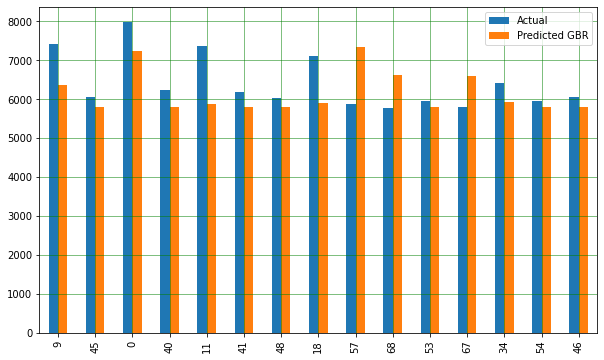

In [113]:
df_temp_gbr = df_temp_gbr.head(30)
df_temp_gbr.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [114]:
# predicting the accuracy score
print("Model Accuracy: %.3f" % gbr.score(X_test_scaled, y_test))

Model Accuracy: -0.409


In [115]:
diff_mre=np.absolute(y_test-gbr_predictions)
MRE_dif_gbr=diff_mre/y_test
MMRE_gbr=np.mean(MRE_dif_gbr)

In [116]:
print('MMRE GBR =',MMRE_gbr)

MMRE GBR = 0.10170583909469912


In [117]:
MMRE_gbr_list=[]
for i in np.arange(1,4):   
    gbr = GradientBoostingRegressor(n_estimators = 1000,
          max_depth = 3,
          min_samples_split = 5,
          learning_rate = 0.001,
          loss = 'huber')
    gbr.fit(X_train_scaled, y_train)
    y_pred_gbr = gbr.predict(X_test_scaled) 
    diff_mre=np.absolute(y_test-y_pred_gbr)
    MRE_dif=diff_mre/y_test
    MMRE_gbr_mean=np.mean(MRE_dif)
    MMRE_gbr_list.append(MMRE_gbr_mean)

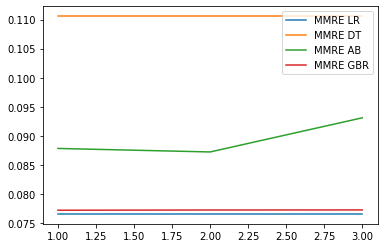

In [118]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,4)

plt.plot(x, MMRE_list_lr)
plt.plot(x, MMRE_dt_list)
plt.plot(x, MMRE_list_AB)
plt.plot(x, MMRE_gbr_list)

plt.legend(['MMRE LR','MMRE DT','MMRE AB', 'MMRE GBR'], loc='upper right')

plt.show()

In [119]:
MMRE_gbr

0.10170583909469912

In [121]:
import plotly.graph_objects as go

colors = ['lightslategray',] * 4
colors[3] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=['MMRE LR','MMRE DT','MMRE AB', 'MMRE GBR'],
    y=[MMRE_list_regression, MMRE_dt, MMRE_AB, MMRE_gbr],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Hasil')